<a href="https://colab.research.google.com/github/ainhoazamora/garden/blob/main/Dana_Valencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primero va todo el codigo para definir como vamos a hacer el procesado

In [ ]:
!pip install pandas numpy matplotlib seaborn wordcloud textblob nltk spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 54.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
warnings.filterwarnings('ignore')


In [ ]:
# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Load Spanish language model for spaCy
nlp = spacy.load('es_core_news_sm')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def load_and_preprocess_data(file_path):
    """Load and preprocess the structured Twitter data"""
    # Read CSV with proper date parsing
    df = pd.read_csv(file_path, parse_dates=['date'])

    # Add processed text column for analysis
    df['processed_text'] = df['content'].apply(preprocess_text)

    # Add sentiment scores
    df['sentiment'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Add flags for different user types
    df['is_government'] = df['handle'] == '@sanchezcastejon'
    print(df)
    return df


In [ ]:
def preprocess_text(text):
    """Clean and preprocess tweet text"""
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)

        # Remove mentions and hashtags
        text = re.sub(r'@\w+|\#\w+', '', text)

        # Remove special characters and numbers
        text = re.sub(r'[^\w\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        return text
    return ''

In [ ]:
def plot_tweet_timeline(df):
    """Plot tweet volume and types over time"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Tweet volume by user type
    daily_tweets = df.groupby([df['date'].dt.date, 'is_government']).size().unstack()
    daily_tweets.plot(ax=ax1, marker='o')
    ax1.set_title('Daily Tweet Volume by User Type')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Number of Tweets')
    ax1.legend(['Public', 'Government'])

    # Plot 2: Tweet types
    daily_types = df.groupby([df['date'].dt.date, 'type']).size().unstack()
    daily_types.plot(ax=ax2, kind='area', stacked=True)
    ax2.set_title('Daily Tweet Types')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Number of Tweets')

    plt.tight_layout()
    return fig

In [ ]:
def analyze_engagement_patterns(df):
    """Analyze engagement patterns by type"""
    # Create engagement analysis plot
    plt.figure(figsize=(10, 6))
    engagement_by_type = df.groupby('engagement_type').size()
    engagement_by_type.plot(kind='bar')
    plt.title('Engagement Types Distribution')
    plt.xlabel('Engagement Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return plt

In [ ]:
def analyze_themes(df):
    """Analyze major themes in tweets"""
    themes = {
        'Emergency Response': ['emergencia', 'ayuda', 'rescate', 'bomberos', '112'],
        'Government Action': ['gobierno', 'ayuntamiento', 'alcalde', 'autoridades'],
        'Community Support': ['vecinos', 'comunidad', 'ayudar', 'solidaridad'],
        'Infrastructure': ['calles', 'carreteras', 'puentes', 'daños'],
        'Safety Concerns': ['peligro', 'riesgo', 'seguridad', 'advertencia'],
        'DANA Impact': ['dana', 'temporal', 'lluvia', 'inundaciones']
    }

    # Initialize theme counts
    theme_counts = {theme: [] for theme in themes}

    # Analyze each tweet
    for text in df['content']:
        if isinstance(text, str):
            text_lower = text.lower()
            for theme, keywords in themes.items():
                if any(keyword in text_lower for keyword in keywords):
                    theme_counts[theme].append(1)
                else:
                    theme_counts[theme].append(0)

    # Convert to DataFrame
    theme_df = pd.DataFrame(theme_counts)

    # Create visualization
    plt.figure(figsize=(12, 6))
    theme_sums = theme_df.sum()
    theme_sums.plot(kind='bar')
    plt.title('Frequency of Themes in Tweets')
    plt.xlabel('Theme')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return theme_df, plt

In [ ]:
def plot_sentiment_analysis(df):
    """Create sentiment analysis visualizations"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Sentiment distribution
    sns.histplot(data=df, x='sentiment', hue='is_government', multiple="layer", alpha=0.5, ax=ax1)
    ax1.set_title('Sentiment Distribution by User Type')
    ax1.set_xlabel('Sentiment Score')
    ax1.set_ylabel('Count')

    # Plot 2: Sentiment over time
    daily_sentiment = df.groupby([df['date'].dt.date, 'is_government'])['sentiment'].mean().unstack()
    daily_sentiment.plot(ax=ax2, marker='o')
    ax2.set_title('Average Daily Sentiment')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Sentiment Score')
    ax2.legend(['Public', 'Government'])

    plt.tight_layout()
    return fig

In [ ]:
def comprehensive_analysis(file_path):
    """Run complete analysis pipeline"""
    print("Loading and preprocessing data...")
    df = load_and_preprocess_data(file_path)

    print("\nBasic Statistics:")
    print(f"Total Tweets: {len(df)}")
    print(f"Government Tweets: {len(df[df['is_government']])}")
    print(f"Public Tweets: {len(df[~df['is_government']])}")
    print(f"Date Range: {df['date'].min().date()} to {df['date'].max().date()}")

    print("\nGenerating visualizations...")

    # Timeline analysis
    plot_tweet_timeline(df)
    plt.show()

    # Engagement analysis
    analyze_engagement_patterns(df)
    plt.show()

    # Theme analysis
    theme_df, theme_plot = analyze_themes(df)
    plt.show()

    # Sentiment analysis
    plot_sentiment_analysis(df)
    plt.show()

    # Word cloud
    text = ' '.join(df['processed_text'].dropna())
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Tweets')
    plt.show()

    return df

#Aqui cargas tu dataset y lo corres



Loading and preprocessing data...
         date             username            handle  \
0  2024-10-29        Pedro Sánchez  @sanchezcastejon   
1  2024-10-29               Goobay         @GaudyGab   
2  2024-10-30        Pedro Sánchez  @sanchezcastejon   
3  2024-10-31           Sr.Liberal        @SrLiberal   
4  2024-11-01        Pedro Sánchez  @sanchezcastejon   
5  2024-11-01        Pedro Sánchez  @sanchezcastejon   
6  2024-11-02        Pedro Sánchez  @sanchezcastejon   
7  2024-11-03        Pedro Sánchez  @sanchezcastejon   
8  2024-11-04        Pedro Sánchez  @sanchezcastejon   
9  2024-11-04  María Jesús Montero       @mjmonteroc   
10 2024-11-05        Pedro Sánchez  @sanchezcastejon   
11 2024-11-05        Pedro Sánchez  @sanchezcastejon   
12 2024-11-05        Pedro Sánchez  @sanchezcastejon   
13 2024-11-06        Pedro Sánchez  @sanchezcastejon   
14 2024-11-07        Pedro Sánchez  @sanchezcastejon   
15 2024-11-08        Pedro Sánchez  @sanchezcastejon   
16 2024-11-11 

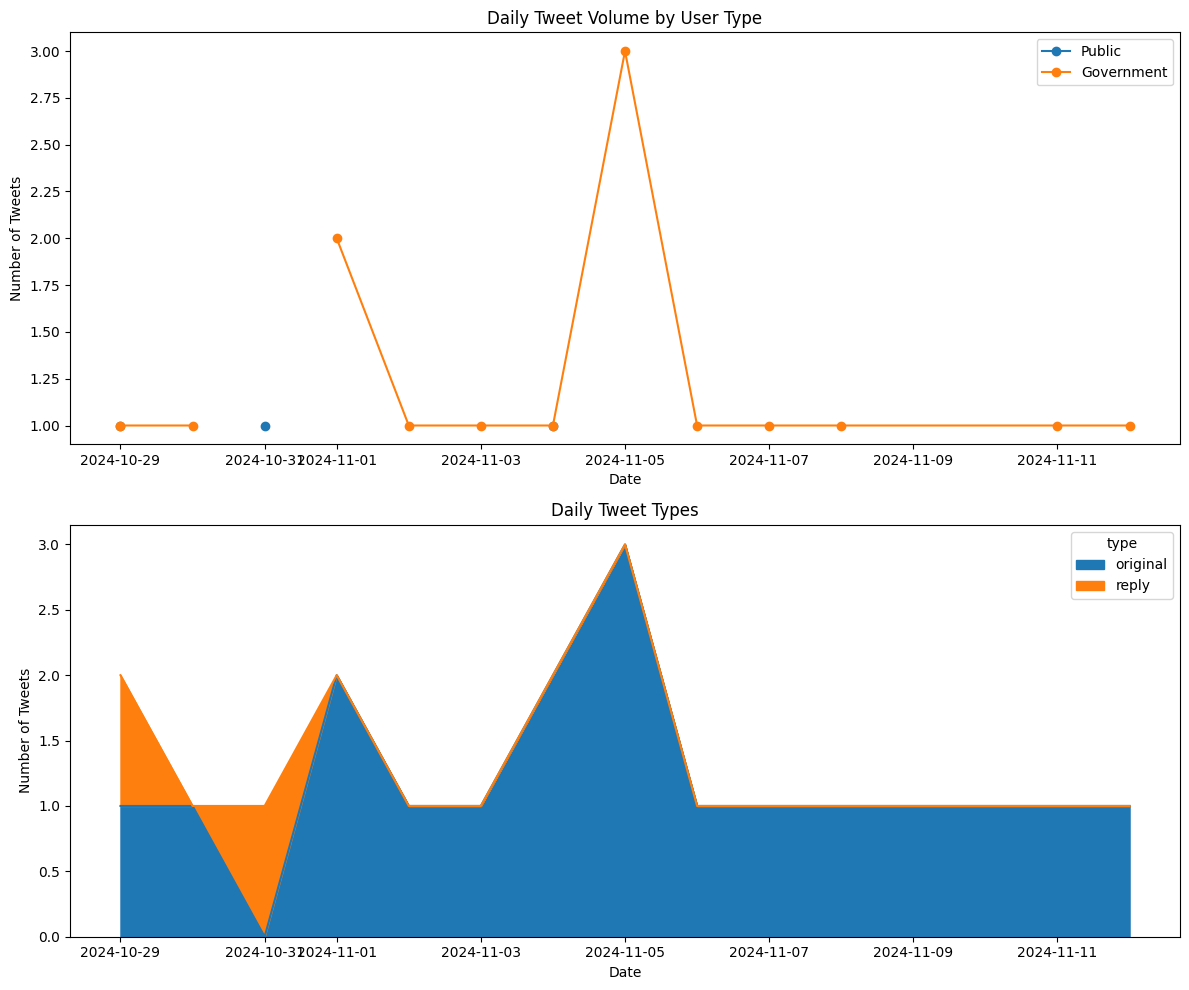

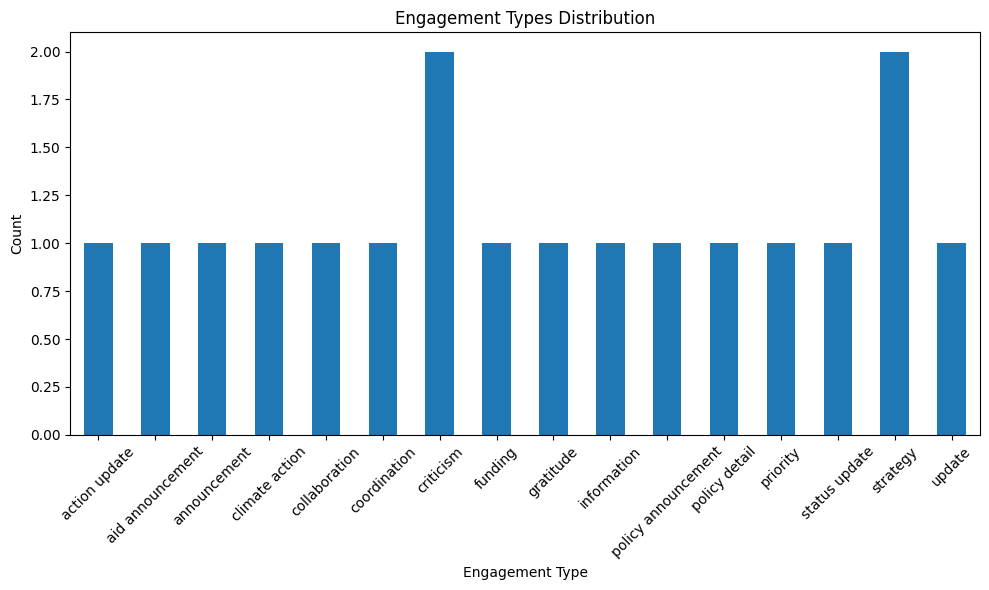

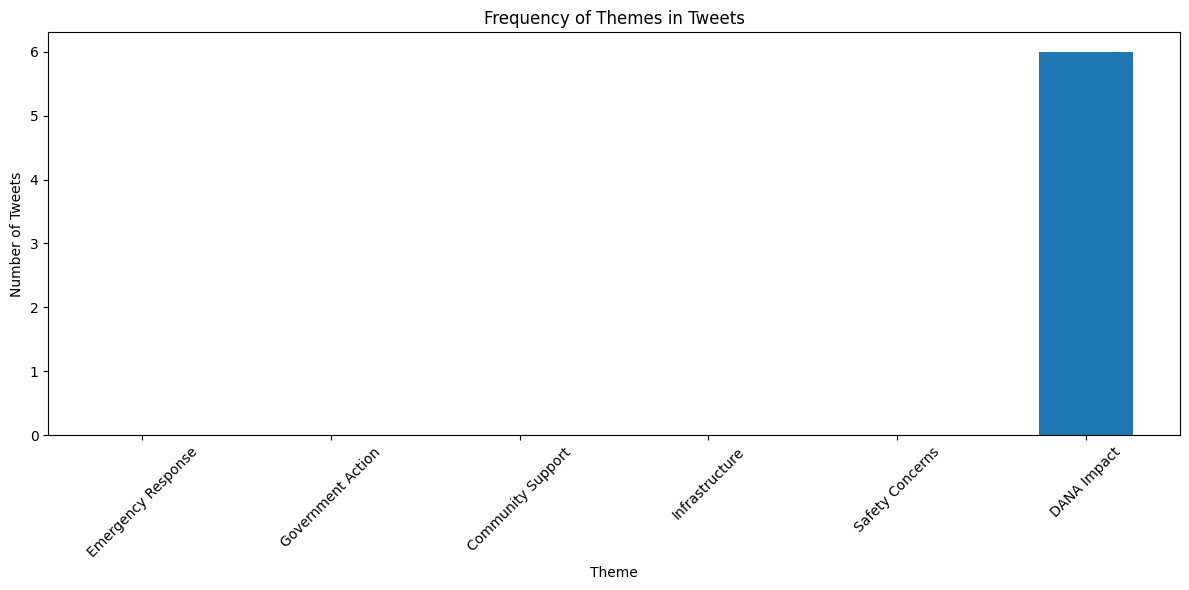

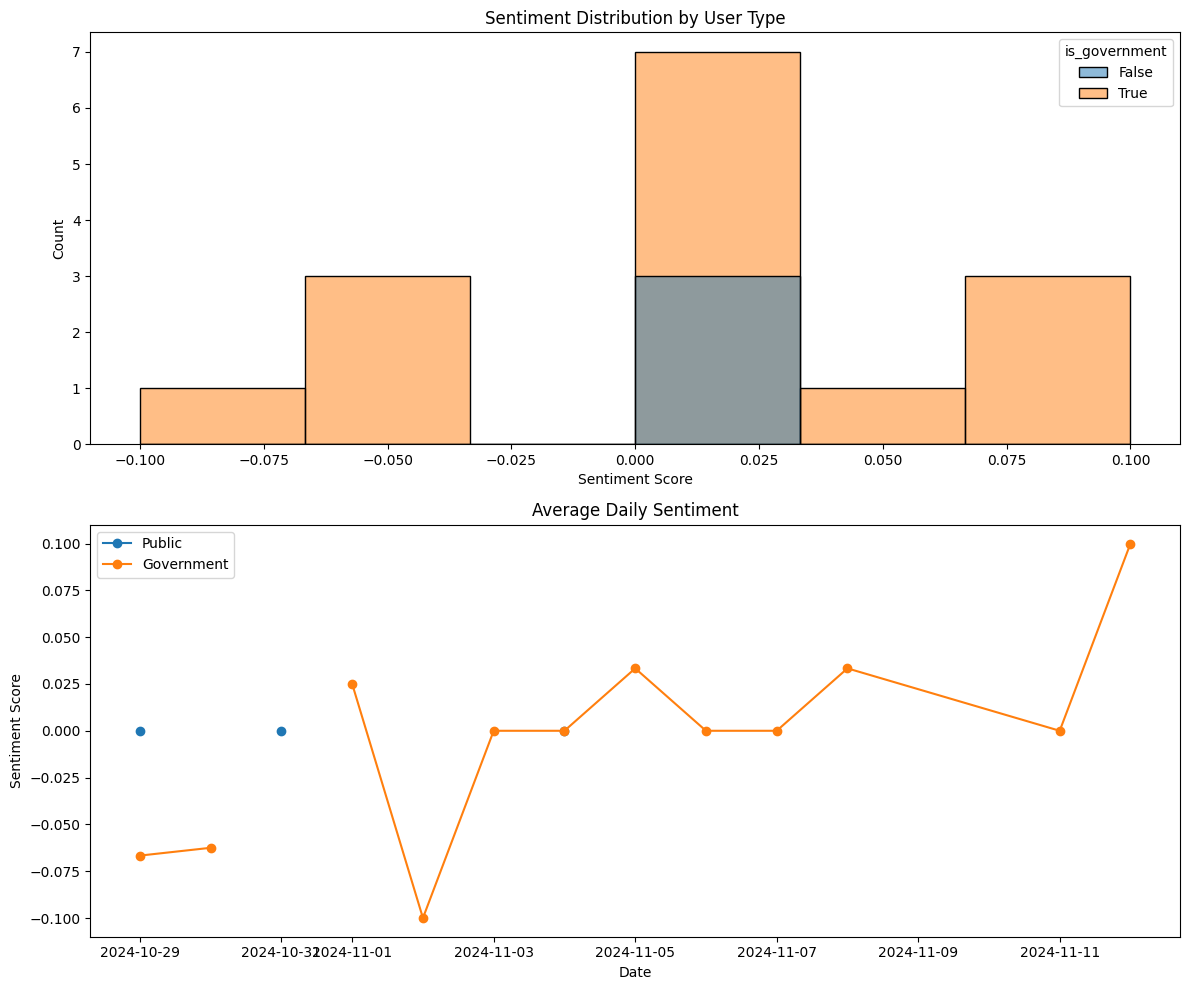

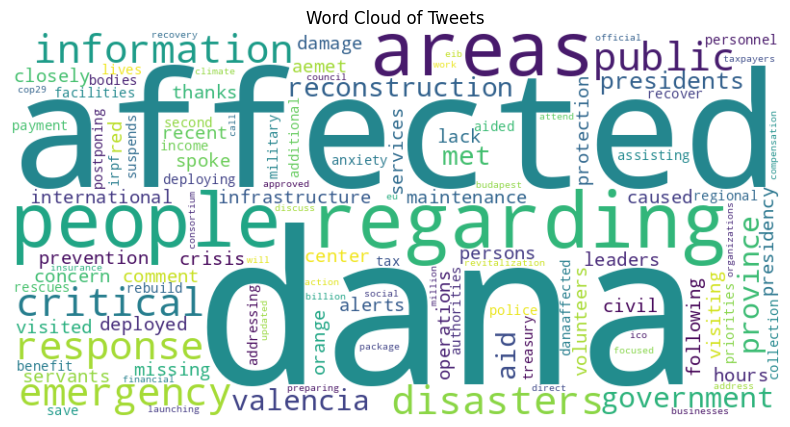

In [ ]:
df = comprehensive_analysis('/content/pedrosanchez.csv')

#Smart natural language processing

In [ ]:
# Run this in a new cell
import nltk

# Download all required resources explicitly
print("Downloading all required NLTK resources...")
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Let's verify with a simpler approach first
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# Test with basic tokenization
test = "This is a test."
print("\nBasic tokenization test:")
print(test.split())

# If that works, then try NLTK tokenization
print("\nNLTK tokenization test:")
print(word_tokenize(test))


Basic tokenization test:
['This', 'is', 'a', 'test.']

NLTK tokenization test:
['This', 'is', 'a', 'test', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import re

class DiscourseAnalyzer:
    def __init__(self, df):
        self.df = df.copy()
        # Add government flag based on handle
        self.df['is_government'] = self.df['handle'] == '@sanchezcastejon'
        self.stopwords = set(stopwords.words('english'))
        # Add context-specific stopwords
        self.stopwords.update(['dana', 'valencia', 'spain', 'rt', 'via', 'http', 'https', 'co'])

        # Initialize frequency distribution
        self.initialize_freq_dist()

    def initialize_freq_dist(self):
        """Initialize frequency distribution for all words in corpus"""
        # Combine all text
        all_text = ' '.join(self.df['content'].dropna())
        words = word_tokenize(all_text.lower())

        # Remove stopwords and non-alphanumeric tokens
        self.clean_words = [w for w in words if w.isalnum() and w not in self.stopwords]

        # Create frequency distribution
        self.freq_dist = FreqDist(self.clean_words)

    def analyze_themes(self):
        """Analyze key themes in the discourse"""
        themes = {
            'emergency_response': [
                'emergency', 'rescue', 'response', 'services', 'help', 'assistance',
                'deployment', 'evacuation', 'intervention', 'urgent', 'immediate',
                'crisis', 'mobilization', 'relief', 'rapid', 'emergency_services',
                'first_responders', 'ambulance', 'firefighters', 'paramedics', 'dispatched',
                'coordination', 'operations', 'rescue_teams', 'emergency_protocol', 'contingency'
            ],

            'government_action': [
                'government', 'authorities', 'officials', 'measures', 'action', 'plan',
                'policy', 'regulation', 'legislation', 'decree', 'directive',
                'administration', 'ministry', 'department', 'agency', 'commission',
                'oversight', 'governance', 'bureaucracy', 'management', 'protocol',
                'implementation', 'enforcement', 'coordination', 'initiative', 'strategy'
            ],

            'community_support': [
                'community', 'neighbors', 'help', 'support', 'solidarity', 'together',
                'volunteers', 'donations', 'charity', 'assistance', 'aid',
                'collaboration', 'cooperation', 'unity', 'mutual_aid', 'grassroots',
                'collective', 'communal', 'local_support', 'neighborhood', 'outreach',
                'community_service', 'voluntary', 'humanitarian', 'social_support', 'helping_hands'
            ],

            'infrastructure': [
                'streets', 'roads', 'bridges', 'damage', 'infrastructure', 'repair',
                'buildings', 'facilities', 'utilities', 'power_lines', 'water_supply',
                'sewage', 'telecommunications', 'transportation', 'public_works', 'construction',
                'maintenance', 'renovation', 'restoration', 'urban', 'structural',
                'engineering', 'technical', 'systems', 'networks', 'installations'
            ],

            'safety_concerns': [
                'danger', 'risk', 'safety', 'warning', 'alert', 'precaution',
                'hazard', 'threat', 'emergency', 'protection', 'security',
                'prevention', 'preparedness', 'caution', 'safeguard', 'vigilance',
                'awareness', 'monitoring', 'assessment', 'evacuation', 'shelter',
                'emergency_protocols', 'safety_measures', 'risk_management', 'contingency', 'readiness'
            ],

            'victims_impact': [
                'affected', 'victims', 'missing', 'displaced', 'lost', 'suffering',
                'casualties', 'injured', 'homeless', 'stranded', 'trapped',
                'vulnerable', 'evacuated', 'impacted', 'bereaved', 'traumatized',
                'survivors', 'families', 'children', 'elderly', 'residents',
                'psychological_impact', 'emotional_trauma', 'loss', 'hardship', 'distress'
            ],

            'recovery_efforts': [
                'recovery', 'rebuild', 'restore', 'reconstruct', 'aid', 'assistance',
                'rehabilitation', 'renewal', 'revival', 'regeneration', 'reconstruction',
                'development', 'improvement', 'progress', 'transformation', 'renovation',
                'healing', 'restoration', 'rebuilding', 'remediation', 'recuperation',
                'stabilization', 'normalization', 'reinstatement', 'reestablishment', 'advancement'
            ],

            'financial_measures': [
                'funding', 'budget', 'allocation', 'resources', 'investment', 'money',
                'compensation', 'reimbursement', 'grants', 'loans', 'subsidies',
                'insurance', 'relief_funds', 'financial_aid', 'economic_support', 'donations',
                'monetary_assistance', 'fiscal_measures', 'emergency_funds', 'payment', 'disbursement',
                'financial_relief', 'cost', 'expenses', 'budget_allocation', 'financing'
            ],

            'environmental_impact': [
                'environmental', 'ecological', 'natural', 'climate', 'weather', 'damage',
                'contamination', 'pollution', 'degradation', 'destruction', 'conservation',
                'preservation', 'sustainability', 'biodiversity', 'ecosystem', 'habitat',
                'environmental_assessment', 'impact_study', 'mitigation', 'restoration', 'protection',
                'natural_resources', 'wildlife', 'vegetation', 'land', 'water'
            ],

            'communication_information': [
                'information', 'communication', 'updates', 'news', 'reports', 'announcements',
                'notifications', 'alerts', 'bulletins', 'advisories', 'messages',
                'media', 'press', 'broadcast', 'publication', 'documentation',
                'transparency', 'disclosure', 'dissemination', 'outreach', 'awareness',
                'public_relations', 'messaging', 'correspondence', 'reporting', 'briefing'
            ],

            'coordination_logistics': [
                'coordination', 'logistics', 'organization', 'planning', 'management', 'operations',
                'deployment', 'distribution', 'allocation', 'arrangement', 'scheduling',
                'supply_chain', 'resources', 'materials', 'equipment', 'supplies',
                'transportation', 'storage', 'inventory', 'procurement', 'delivery',
                'mobilization', 'coordination_center', 'command', 'control', 'administration'
            ],

            'political_response': [
                'political', 'policy', 'governance', 'leadership', 'administration', 'authority',
                'decision-making', 'responsibility', 'accountability', 'oversight', 'management',
                'representation', 'advocacy', 'diplomacy', 'negotiation', 'mediation',
                'legislation', 'regulation', 'enforcement', 'compliance', 'supervision',
                'direction', 'strategy', 'planning', 'implementation', 'execution'
            ],

            'social_impact': [
                'social', 'community', 'society', 'public', 'population', 'people',
                'wellbeing', 'welfare', 'quality_of_life', 'living_conditions', 'circumstances',
                'social_services', 'social_support', 'social_care', 'social_protection', 'social_assistance',
                'community_impact', 'social_consequences', 'social_effects', 'disruption', 'adjustment',
                'social_needs', 'social_problems', 'social_issues', 'social_challenges', 'social_recovery'
            ]
        }

        theme_counts = []
        for _, row in self.df.iterrows():
            if not isinstance(row['content'], str):
                continue

            text = row['content'].lower()
            counts = {}
            for theme, keywords in themes.items():
                counts[theme] = sum(1 for word in keywords if word in text)
            counts['speaker_type'] = 'Government' if row['is_government'] else 'Public'
            theme_counts.append(counts)

        return pd.DataFrame(theme_counts)

    def find_bigrams(self):
        """Find significant bigrams in the corpus"""
        bigram_measures = BigramAssocMeasures()
        finder = BigramCollocationFinder.from_words(self.clean_words)
        finder.apply_freq_filter(2)
        return finder.nbest(bigram_measures.pmi, 10)

    def visualize_analysis(self):
        """Create visualizations for discourse analysis"""
        fig = plt.figure(figsize=(20, 15))
        gs = fig.add_gridspec(2, 2)

        # 1. Theme Analysis
        themes_df = self.analyze_themes()
        ax1 = fig.add_subplot(gs[0, :])
        theme_pivot = pd.pivot_table(themes_df,
                                   index='speaker_type',
                                   values=themes_df.columns[:-1],
                                   aggfunc='mean')
        sns.heatmap(theme_pivot, cmap='YlOrRd', ax=ax1)
        ax1.set_title('Theme Usage by Speaker Type')

        # 2. Word Frequencies
        ax2 = fig.add_subplot(gs[1, 0])
        words, freqs = zip(*self.freq_dist.most_common(10))
        ax2.bar(words, freqs)
        ax2.set_title('Most Common Terms')
        ax2.tick_params(axis='x', rotation=45)

        # 3. Bigram Analysis
        ax3 = fig.add_subplot(gs[1, 1])
        bigrams = self.find_bigrams()
        x = range(len(bigrams))
        bigram_freqs = [self.freq_dist[b[0]] * self.freq_dist[b[1]] for b in bigrams]
        ax3.bar(x, bigram_freqs)
        ax3.set_xticks(x)
        ax3.set_xticklabels([' '.join(b) for b in bigrams], rotation=45)
        ax3.set_title('Most Significant Word Pairs')

        plt.tight_layout()
        return fig

def run_discourse_analysis(file_path):
    """Run complete discourse analysis"""
    # Load data
    print("Loading data...")
    df = pd.read_csv(file_path)

    # Initialize analyzer
    analyzer = DiscourseAnalyzer(df)

    # Generate visualizations
    print("Analyzing discourse patterns...")
    analyzer.visualize_analysis()
    plt.show()

    # Print summary
    print("\nDiscourse Pattern Summary:")
    print("\nMost common terms:")
    for word, count in analyzer.freq_dist.most_common(10):
        print(f"- {word}: {count}")

    print("\nSignificant word pairs:")
    for bigram in analyzer.find_bigrams():
        print(f"- {' '.join(bigram)}")

    return analyzer

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

class EnhancedDiscourseAnalyzer:
    def __init__(self, df):
        self.df = df.copy()
        self.df['is_government'] = self.df['handle'] == '@sanchezcastejon'
        self.sia = SentimentIntensityAnalyzer()

        # Comprehensive themes for crisis communication
        self.themes = {
            'emergency_response': [
                'emergency', 'rescue', 'response', 'services', 'help', 'assistance',
                'deployment', 'evacuation', 'intervention', 'urgent', 'immediate',
                'crisis', 'mobilization', 'relief', 'rapid', 'emergency_services',
                'first_responders', 'ambulance', 'firefighters', 'paramedics', 'dispatched',
                'coordination', 'operations', 'rescue_teams', 'emergency_protocol', 'contingency'
            ],

            'government_action': [
                'government', 'authorities', 'officials', 'measures', 'action', 'plan',
                'policy', 'regulation', 'legislation', 'decree', 'directive',
                'administration', 'ministry', 'department', 'agency', 'commission',
                'oversight', 'governance', 'bureaucracy', 'management', 'protocol',
                'implementation', 'enforcement', 'coordination', 'initiative', 'strategy'
            ],

            'community_support': [
                'community', 'neighbors', 'help', 'support', 'solidarity', 'together',
                'volunteers', 'donations', 'charity', 'assistance', 'aid',
                'collaboration', 'cooperation', 'unity', 'mutual_aid', 'grassroots',
                'collective', 'communal', 'local_support', 'neighborhood', 'outreach',
                'community_service', 'voluntary', 'humanitarian', 'social_support', 'helping_hands'
            ],

            'infrastructure': [
                'streets', 'roads', 'bridges', 'damage', 'infrastructure', 'repair',
                'buildings', 'facilities', 'utilities', 'power_lines', 'water_supply',
                'sewage', 'telecommunications', 'transportation', 'public_works', 'construction',
                'maintenance', 'renovation', 'restoration', 'urban', 'structural',
                'engineering', 'technical', 'systems', 'networks', 'installations'
            ],

            'safety_concerns': [
                'danger', 'risk', 'safety', 'warning', 'alert', 'precaution',
                'hazard', 'threat', 'emergency', 'protection', 'security',
                'prevention', 'preparedness', 'caution', 'safeguard', 'vigilance',
                'awareness', 'monitoring', 'assessment', 'evacuation', 'shelter',
                'emergency_protocols', 'safety_measures', 'risk_management', 'contingency', 'readiness'
            ],

            'victims_impact': [
                'affected', 'victims', 'missing', 'displaced', 'lost', 'suffering',
                'casualties', 'injured', 'homeless', 'stranded', 'trapped',
                'vulnerable', 'evacuated', 'impacted', 'bereaved', 'traumatized',
                'survivors', 'families', 'children', 'elderly', 'residents',
                'psychological_impact', 'emotional_trauma', 'loss', 'hardship', 'distress'
            ],

            'recovery_efforts': [
                'recovery', 'rebuild', 'restore', 'reconstruct', 'aid', 'assistance',
                'rehabilitation', 'renewal', 'revival', 'regeneration', 'reconstruction',
                'development', 'improvement', 'progress', 'transformation', 'renovation',
                'healing', 'restoration', 'rebuilding', 'remediation', 'recuperation',
                'stabilization', 'normalization', 'reinstatement', 'reestablishment', 'advancement'
            ],

            'financial_measures': [
                'funding', 'budget', 'allocation', 'resources', 'investment', 'money',
                'compensation', 'reimbursement', 'grants', 'loans', 'subsidies',
                'insurance', 'relief_funds', 'financial_aid', 'economic_support', 'donations',
                'monetary_assistance', 'fiscal_measures', 'emergency_funds', 'payment', 'disbursement',
                'financial_relief', 'cost', 'expenses', 'budget_allocation', 'financing'
            ],

            'environmental_impact': [
                'environmental', 'ecological', 'natural', 'climate', 'weather', 'damage',
                'contamination', 'pollution', 'degradation', 'destruction', 'conservation',
                'preservation', 'sustainability', 'biodiversity', 'ecosystem', 'habitat',
                'environmental_assessment', 'impact_study', 'mitigation', 'restoration', 'protection',
                'natural_resources', 'wildlife', 'vegetation', 'land', 'water'
            ],

            'communication_information': [
                'information', 'communication', 'updates', 'news', 'reports', 'announcements',
                'notifications', 'alerts', 'bulletins', 'advisories', 'messages',
                'media', 'press', 'broadcast', 'publication', 'documentation',
                'transparency', 'disclosure', 'dissemination', 'outreach', 'awareness',
                'public_relations', 'messaging', 'correspondence', 'reporting', 'briefing'
            ],

            'coordination_logistics': [
                'coordination', 'logistics', 'organization', 'planning', 'management', 'operations',
                'deployment', 'distribution', 'allocation', 'arrangement', 'scheduling',
                'supply_chain', 'resources', 'materials', 'equipment', 'supplies',
                'transportation', 'storage', 'inventory', 'procurement', 'delivery',
                'mobilization', 'coordination_center', 'command', 'control', 'administration'
            ],

            'political_response': [
                'political', 'policy', 'governance', 'leadership', 'administration', 'authority',
                'decision-making', 'responsibility', 'accountability', 'oversight', 'management',
                'representation', 'advocacy', 'diplomacy', 'negotiation', 'mediation',
                'legislation', 'regulation', 'enforcement', 'compliance', 'supervision',
                'direction', 'strategy', 'planning', 'implementation', 'execution'
            ],

            'social_impact': [
                'social', 'community', 'society', 'public', 'population', 'people',
                'wellbeing', 'welfare', 'quality_of_life', 'living_conditions', 'circumstances',
                'social_services', 'social_support', 'social_care', 'social_protection', 'social_assistance',
                'community_impact', 'social_consequences', 'social_effects', 'disruption', 'adjustment',
                'social_needs', 'social_problems', 'social_issues', 'social_challenges', 'social_recovery'
            ]
        }

        # Discourse markers for power and authority
        self.power_markers = {
            'institutional_authority': [
                'must', 'should', 'need to', 'require', 'mandate', 'direct',
                'order', 'demand', 'instruct', 'command', 'decree'
            ],
            'expertise_claims': [
                'experts', 'analysis', 'assessment', 'evaluation', 'study',
                'research', 'evidence', 'data', 'findings', 'investigation'
            ],
            'emergency_authority': [
                'alert', 'warning', 'urgent', 'immediate', 'critical',
                'essential', 'vital', 'crucial', 'emergency', 'priority'
            ]
        }

        # Communication style markers
        self.communication_styles = {
            'formal_bureaucratic': [
                'hereby', 'pursuant', 'accordingly', 'furthermore', 'moreover',
                'therefore', 'consequently', 'subsequently', 'henceforth'
            ],
            'empathetic_personal': [
                'understand', 'support', 'help', 'care', 'concerned',
                'together', 'community', 'solidarity', 'unite', 'share'
            ],
            'technical_professional': [
                'implement', 'coordinate', 'facilitate', 'establish', 'develop',
                'monitor', 'assess', 'evaluate', 'analyze', 'determine'
            ]
        }

    def analyze_theme_presence(self, text):
        """Analyze presence of different themes in text"""
        if not isinstance(text, str):
            return {theme: 0 for theme in self.themes.keys()}

        text_lower = text.lower()
        text_words = set(text_lower.split())

        theme_scores = {}
        for theme, keywords in self.themes.items():
            matches = sum(1 for keyword in keywords if keyword.lower() in text_words)
            theme_scores[theme] = matches

        return theme_scores

    def analyze_power_dynamics(self, text):
        """Analyze power dynamics in communication"""
        if not isinstance(text, str):
            return {marker: 0 for marker in self.power_markers.keys()}

        text_lower = text.lower()
        text_words = set(text_lower.split())

        power_scores = {}
        for marker_type, markers in self.power_markers.items():
            matches = sum(1 for marker in markers if marker.lower() in text_words)
            power_scores[marker_type] = matches

        return power_scores

    def analyze_communication_style(self, text):
        """Analyze communication style patterns"""
        if not isinstance(text, str):
            return {style: 0 for style in self.communication_styles.keys()}

        text_lower = text.lower()
        text_words = set(text_lower.split())

        style_scores = {}
        for style, markers in self.communication_styles.items():
            matches = sum(1 for marker in markers if marker.lower() in text_words)
            style_scores[style] = matches

        return style_scores

    def get_sentiment_profile(self, text):
        """Get detailed sentiment analysis"""
        if not isinstance(text, str):
            return {'compound': 0, 'pos': 0, 'neg': 0, 'neu': 0}

        scores = self.sia.polarity_scores(text)
        return scores

    def analyze_full_discourse(self):
        """Perform comprehensive discourse analysis"""
        analysis_results = []

        for _, row in self.df.iterrows():
            if not isinstance(row['content'], str):
                continue

            # Get all analyses
            themes = self.analyze_theme_presence(row['content'])
            power = self.analyze_power_dynamics(row['content'])
            style = self.analyze_communication_style(row['content'])
            sentiment = self.get_sentiment_profile(row['content'])

            # Combine all features with corrected speaker_type
            result = {
                'speaker_type': 'Government' if row['is_government'] else 'Public',
                'content': row['content'],  # Keep original text
                **themes,
                **power,
                **style,
                **sentiment
            }

            analysis_results.append(result)

        # Convert to DataFrame and force speaker_type as category
        results_df = pd.DataFrame(analysis_results)
        results_df['speaker_type'] = pd.Categorical(results_df['speaker_type'])

        return results_df

    def visualize_discourse_patterns(self):
        """Create visualizations for discourse analysis"""
        results_df = self.analyze_full_discourse()

        # Create figure
        fig = plt.figure(figsize=(20, 25))
        gs = fig.add_gridspec(5, 2)

        # 1. Theme Analysis
        ax1 = fig.add_subplot(gs[0, :])
        theme_cols = list(self.themes.keys())
        theme_pivot = results_df.groupby('speaker_type')[theme_cols].mean()
        sns.heatmap(theme_pivot, cmap='YlOrRd', ax=ax1)
        ax1.set_title('Theme Presence in Discourse')

        # 2. Power Dynamics
        ax2 = fig.add_subplot(gs[1, 0])
        power_cols = list(self.power_markers.keys())
        power_pivot = results_df.groupby('speaker_type')[power_cols].mean()
        sns.heatmap(power_pivot, cmap='YlOrRd', ax=ax2)
        ax2.set_title('Power Dynamics in Communication')

        # 3. Communication Style
        ax3 = fig.add_subplot(gs[1, 1])
        style_cols = list(self.communication_styles.keys())
        style_pivot = results_df.groupby('speaker_type')[style_cols].mean()
        sns.heatmap(style_pivot, cmap='YlOrRd', ax=ax3)
        ax3.set_title('Communication Style Patterns')

        # 4. Sentiment Analysis
        ax4 = fig.add_subplot(gs[2, :])
        sentiment_cols = ['compound', 'pos', 'neg', 'neu']
        sentiment_pivot = results_df.groupby('speaker_type')[sentiment_cols].mean()
        sns.heatmap(sentiment_pivot, cmap='RdYlGn', center=0, ax=ax4)
        ax4.set_title('Sentiment Analysis by Speaker Type')

        # 5. Theme Evolution (if date information is available)
        if 'date' in self.df.columns:
            ax5 = fig.add_subplot(gs[3:, :])
            theme_evolution = results_df.groupby('speaker_type')[theme_cols].mean()
            theme_evolution.T.plot(kind='bar', ax=ax5)
            ax5.set_title('Theme Usage Comparison')
            ax5.set_xlabel('Themes')
            ax5.set_ylabel('Average Presence')
            plt.xticks(rotation=45)

        plt.tight_layout()
        return fig, results_df

def run_enhanced_analysis(file_path):
    """Run complete enhanced discourse analysis"""
    print("Loading data...")
    df = pd.read_csv(file_path)

    print("Initializing analyzer...")
    analyzer = EnhancedDiscourseAnalyzer(df)

    print("Analyzing discourse patterns...")
    fig, results = analyzer.visualize_discourse_patterns()
    plt.show()

    print("\nDiscourse Analysis Summary:")

    # Calculate and print summary statistics
    gov_results = results[results['speaker_type'] == 'Government'].mean()
    public_results = results[results['speaker_type'] == 'Public'].mean()

    print("\nGovernment Communication Profile:")
    print("- Dominant Themes:", sorted(
        [(theme, score) for theme in analyzer.themes.keys() if (score := gov_results[theme]) > 0],
        key=lambda x: x[1], reverse=True)[:3])
    print("- Power Dynamics:", {k: f"{gov_results[k]:.2f}" for k in analyzer.power_markers.keys()})
    print("- Communication Style:", {k: f"{gov_results[k]:.2f}" for k in analyzer.communication_styles.keys()})

    print("\nPublic Communication Profile:")
    print("- Dominant Themes:", sorted(
        [(theme, score) for theme in analyzer.themes.keys() if (score := public_results[theme]) > 0],
        key=lambda x: x[1], reverse=True)[:3])
    print("- Power Dynamics:", {k: f"{public_results[k]:.2f}" for k in analyzer.power_markers.keys()})
    print("- Communication Style:", {k: f"{public_results[k]:.2f}" for k in analyzer.communication_styles.keys()})

    return analyzer

Loading data...
Initializing analyzer...
Analyzing discourse patterns...


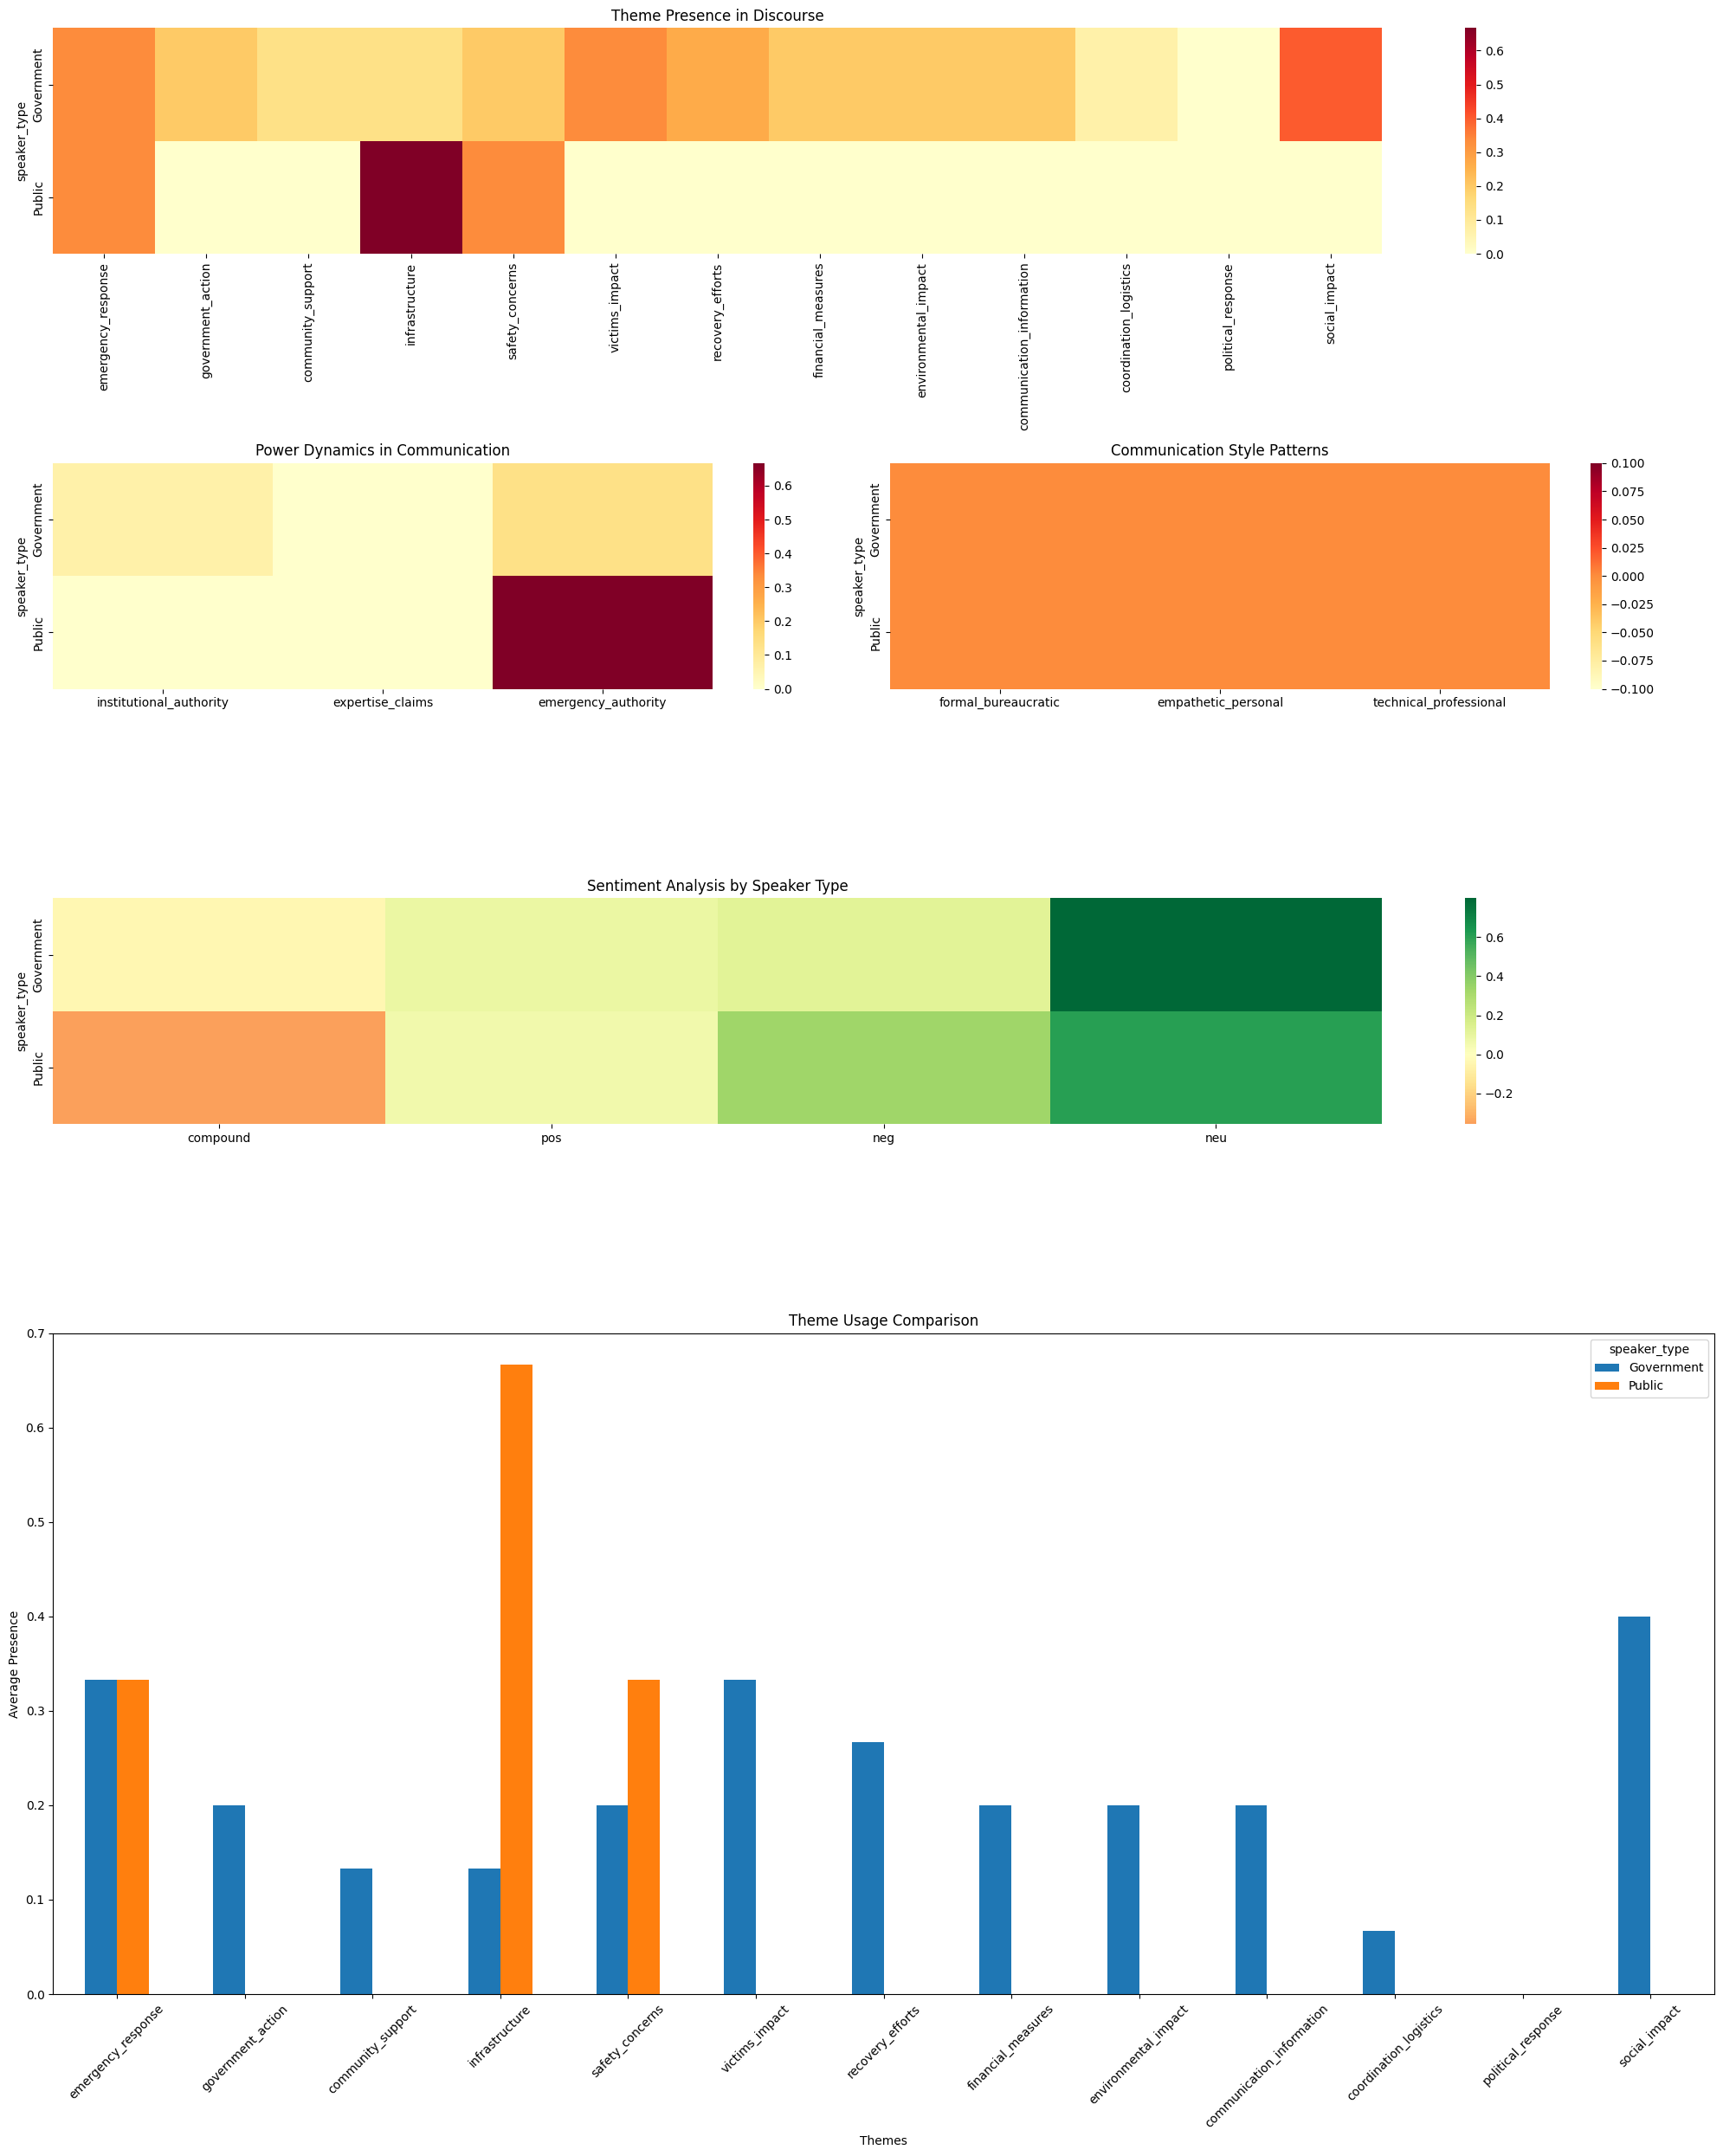


Discourse Analysis Summary:


TypeError: Could not convert ["Following closely with concern the information about missing persons and damage caused by DANA in recent hours. All emergency services deployed.Spoke with @antonioguterres @vonderleyen and other international leaders about DANA crisisVisited AEMET operations center. DANA not over, provinces with orange and red alertsThanks to public servants and volunteers. Visiting Civil Protection facilitiesGovernment assisting regional authorities. 4,800 rescues and 30,000 people aided. Deploying 5,000 military personnel and 5,000 additional policeAddressing public anxiety. Priorities: save lives, recover bodies, rebuild affected areasPostponing second income tax payment for affected areas in Valencia province. 200,000 people to benefitApproved €10.6 billion for reconstruction. Direct aid to affected people and businessesLaunching @InfoDanaGob for official updated informationWill not attend EU Council in Budapest to address DANA emergencyEIB preparing €900 million financial package for recoveryMet with ICO and Insurance Compensation Consortium presidents regarding aidMet with social organizations' presidents to discuss their work in affected areasGovernment focused on reconstruction, response, and revitalizationCall to action from COP29 regarding climate disasters"] to numeric

In [ ]:
# Example usage:
analyzer = run_enhanced_analysis('pedrosanchez.csv')

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

class DiscourseAnalyzer:
    def __init__(self, df):
        self.df = df.copy()
        # Create clean speaker type
        self.df['speaker_type'] = ['Government' if handle == '@sanchezcastejon' else 'Public'
                                  for handle in self.df['handle']]
        self.sia = SentimentIntensityAnalyzer()

        # Define discourse markers
        self.discourse_markers = {
            'authority': ['must', 'should', 'need', 'require', 'direct', 'order'],
            'urgency': ['immediate', 'urgent', 'critical', 'emergency', 'crisis'],
            'solidarity': ['together', 'support', 'help', 'community', 'unite'],
            'technical': ['implement', 'assess', 'coordinate', 'establish', 'deploy'],
            'empathy': ['understand', 'care', 'feel', 'suffer', 'concern']
        }

    def analyze_sentiment(self, text):
        """Analyze sentiment of text"""
        if not isinstance(text, str):
            return {'compound': 0, 'pos': 0, 'neg': 0, 'neu': 0}
        return self.sia.polarity_scores(text)

    def count_discourse_markers(self, text):
        """Count occurrences of discourse markers"""
        if not isinstance(text, str):
            return {marker: 0 for marker in self.discourse_markers.keys()}

        text_lower = text.lower()
        counts = {}
        for marker_type, words in self.discourse_markers.items():
            counts[marker_type] = sum(1 for word in words if word in text_lower)
        return counts

    def analyze_tweets(self):
        """Analyze all tweets"""
        results = []

        for _, row in self.df.iterrows():
            # Get sentiment
            sentiment = self.analyze_sentiment(row['content'])

            # Get discourse markers
            markers = self.count_discourse_markers(row['content'])

            # Combine results
            result = {
                'speaker_type': row['speaker_type'],
                **sentiment,
                **markers
            }
            results.append(result)

        return pd.DataFrame(results)

    def visualize_analysis(self):
        """Create visualizations"""
        results = self.analyze_tweets()

        # Create figure
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

        # 1. Sentiment Analysis
        sentiment_cols = ['compound', 'pos', 'neg', 'neu']
        sentiment_mean = results.groupby('speaker_type')[sentiment_cols].mean()
        sns.heatmap(sentiment_mean, cmap='RdYlGn', center=0, ax=ax1)
        ax1.set_title('Sentiment Analysis by Speaker Type')

        # 2. Discourse Markers
        marker_cols = list(self.discourse_markers.keys())
        marker_mean = results.groupby('speaker_type')[marker_cols].mean()
        sns.heatmap(marker_mean, cmap='YlOrRd', ax=ax2)
        ax2.set_title('Discourse Marker Usage')

        # 3. Sentiment Distribution
        sns.boxplot(data=results, x='speaker_type', y='compound', ax=ax3)
        ax3.set_title('Sentiment Distribution')

        # 4. Discourse Marker Comparison
        marker_mean.plot(kind='bar', ax=ax4)
        ax4.set_title('Discourse Marker Comparison')
        ax4.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        return fig, results

def run_analysis(file_path):
    """Run complete discourse analysis"""
    print("Loading data...")
    df = pd.read_csv(file_path)

    print("Analyzing discourse patterns...")
    analyzer = DiscourseAnalyzer(df)
    fig, results = analyzer.visualize_analysis()
    plt.show()

    # Print summary statistics
    print("\nDiscourse Analysis Summary:")

    for speaker in ['Government', 'Public']:
        print(f"\n{speaker} Communication Style:")
        speaker_data = results[results['speaker_type'] == speaker].mean()

        print("Sentiment Profile:")
        sentiment_scores = {k: f"{speaker_data[k]:.3f}"
                          for k in ['compound', 'pos', 'neg', 'neu']}
        print(sentiment_scores)

        print("\nDiscourse Markers:")
        marker_scores = {k: f"{speaker_data[k]:.3f}"
                        for k in analyzer.discourse_markers.keys()}
        print(marker_scores)

    return analyzer

Loading data...
Analyzing discourse patterns...


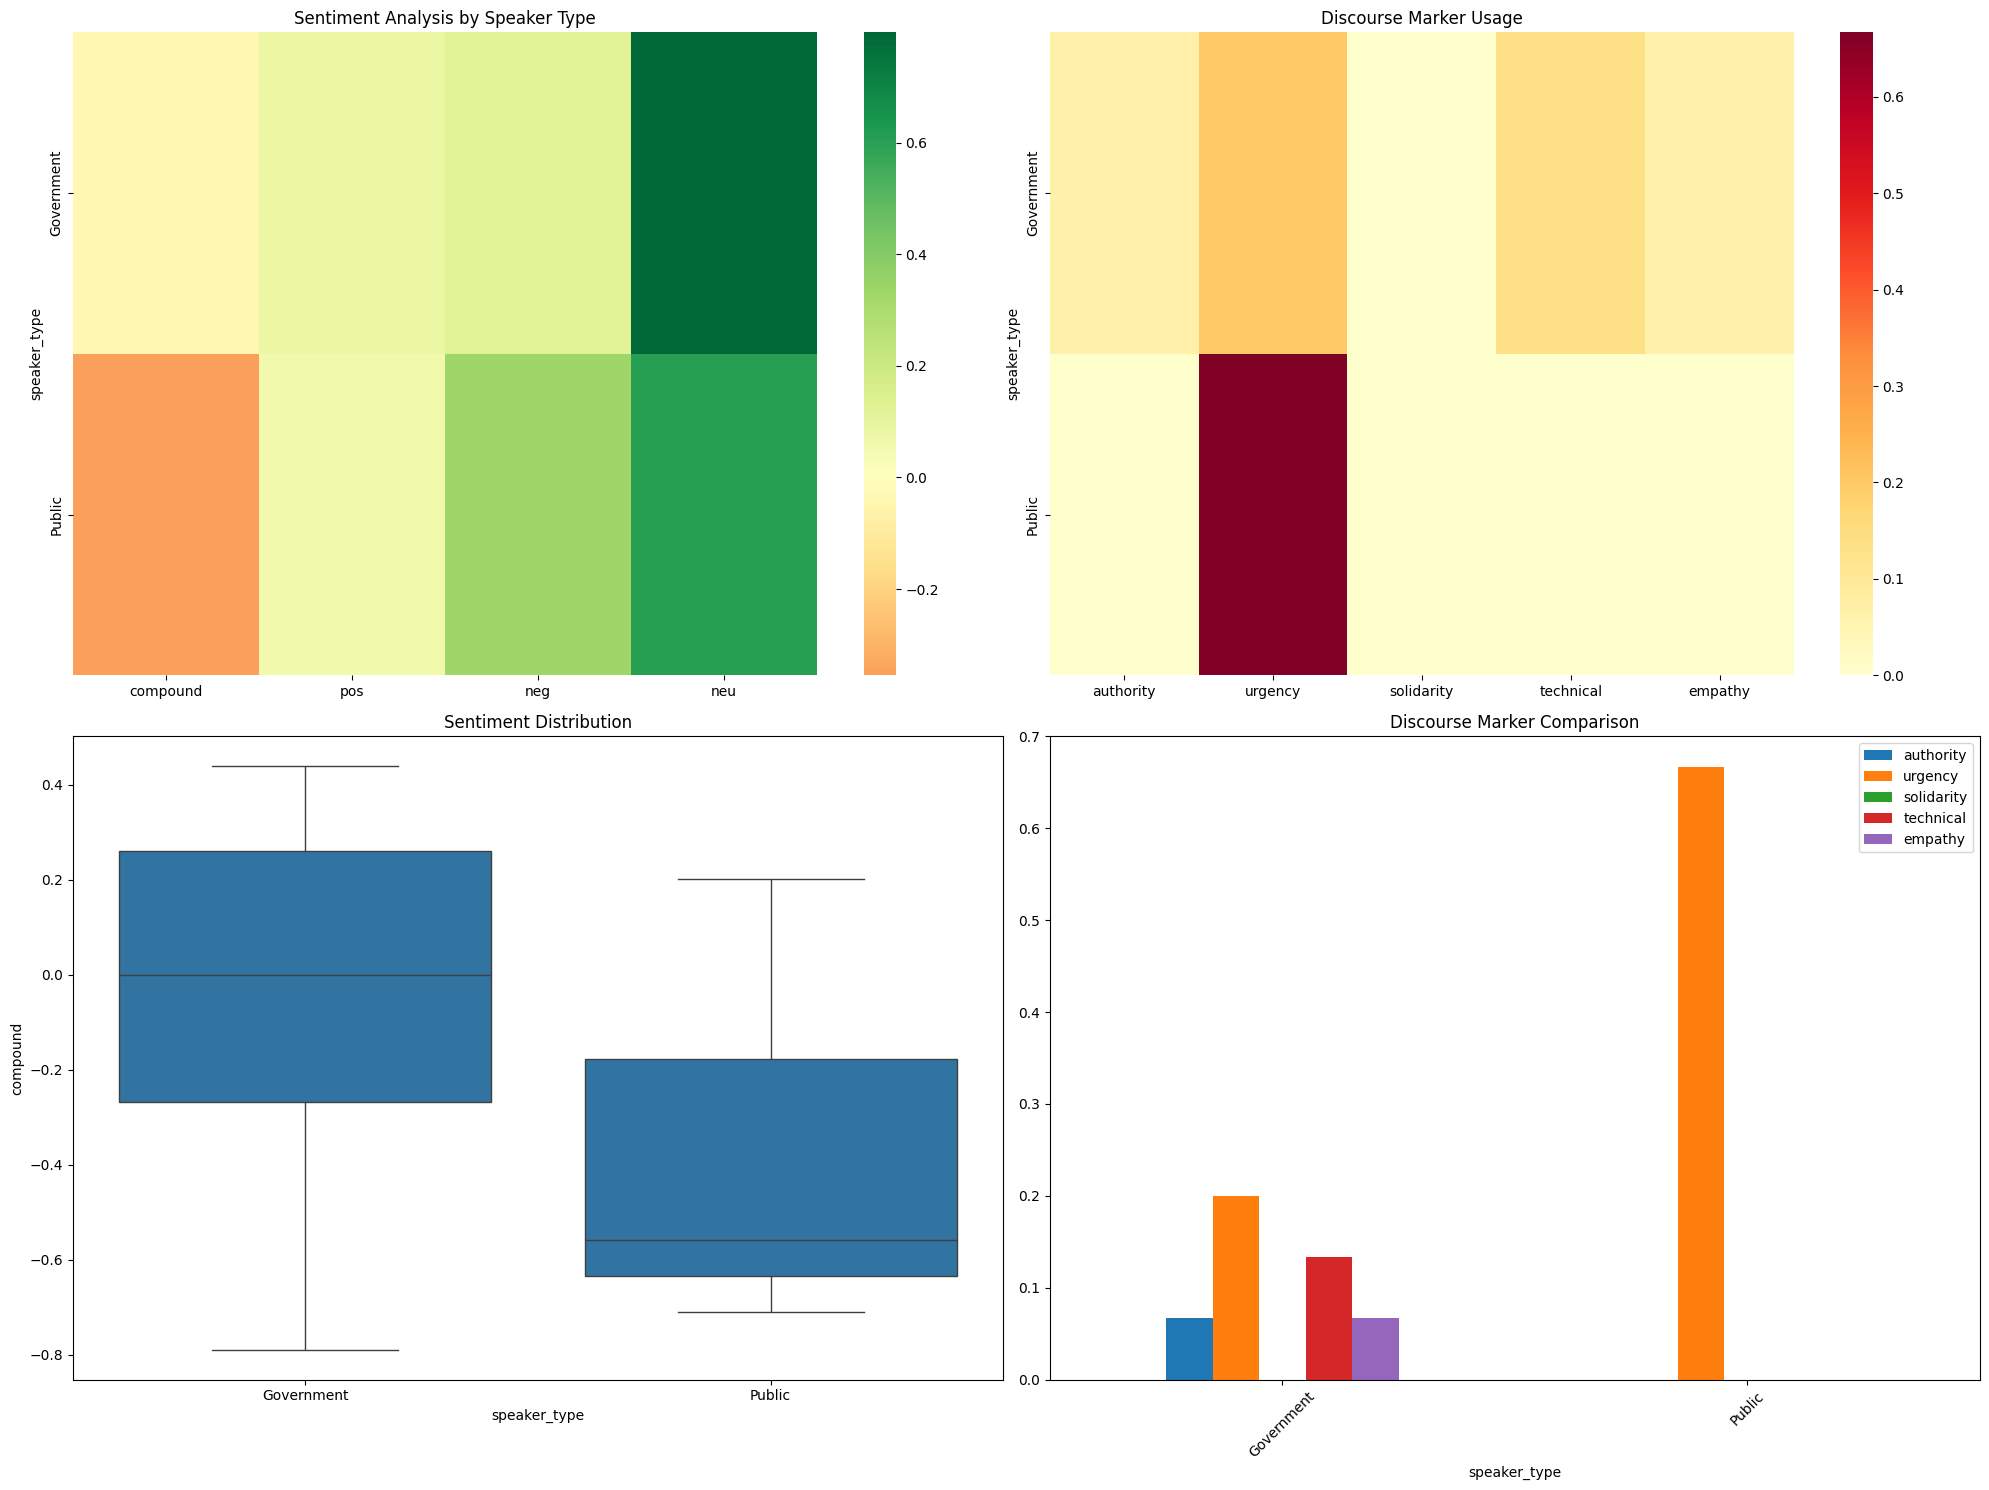


Discourse Analysis Summary:

Government Communication Style:


TypeError: Could not convert ['GovernmentGovernmentGovernmentGovernmentGovernmentGovernmentGovernmentGovernmentGovernmentGovernmentGovernmentGovernmentGovernmentGovernmentGovernment'] to numeric

In [ ]:
analyzer = run_analysis('pedrosanchez.csv')

Loading data...
Analyzing discourse patterns...


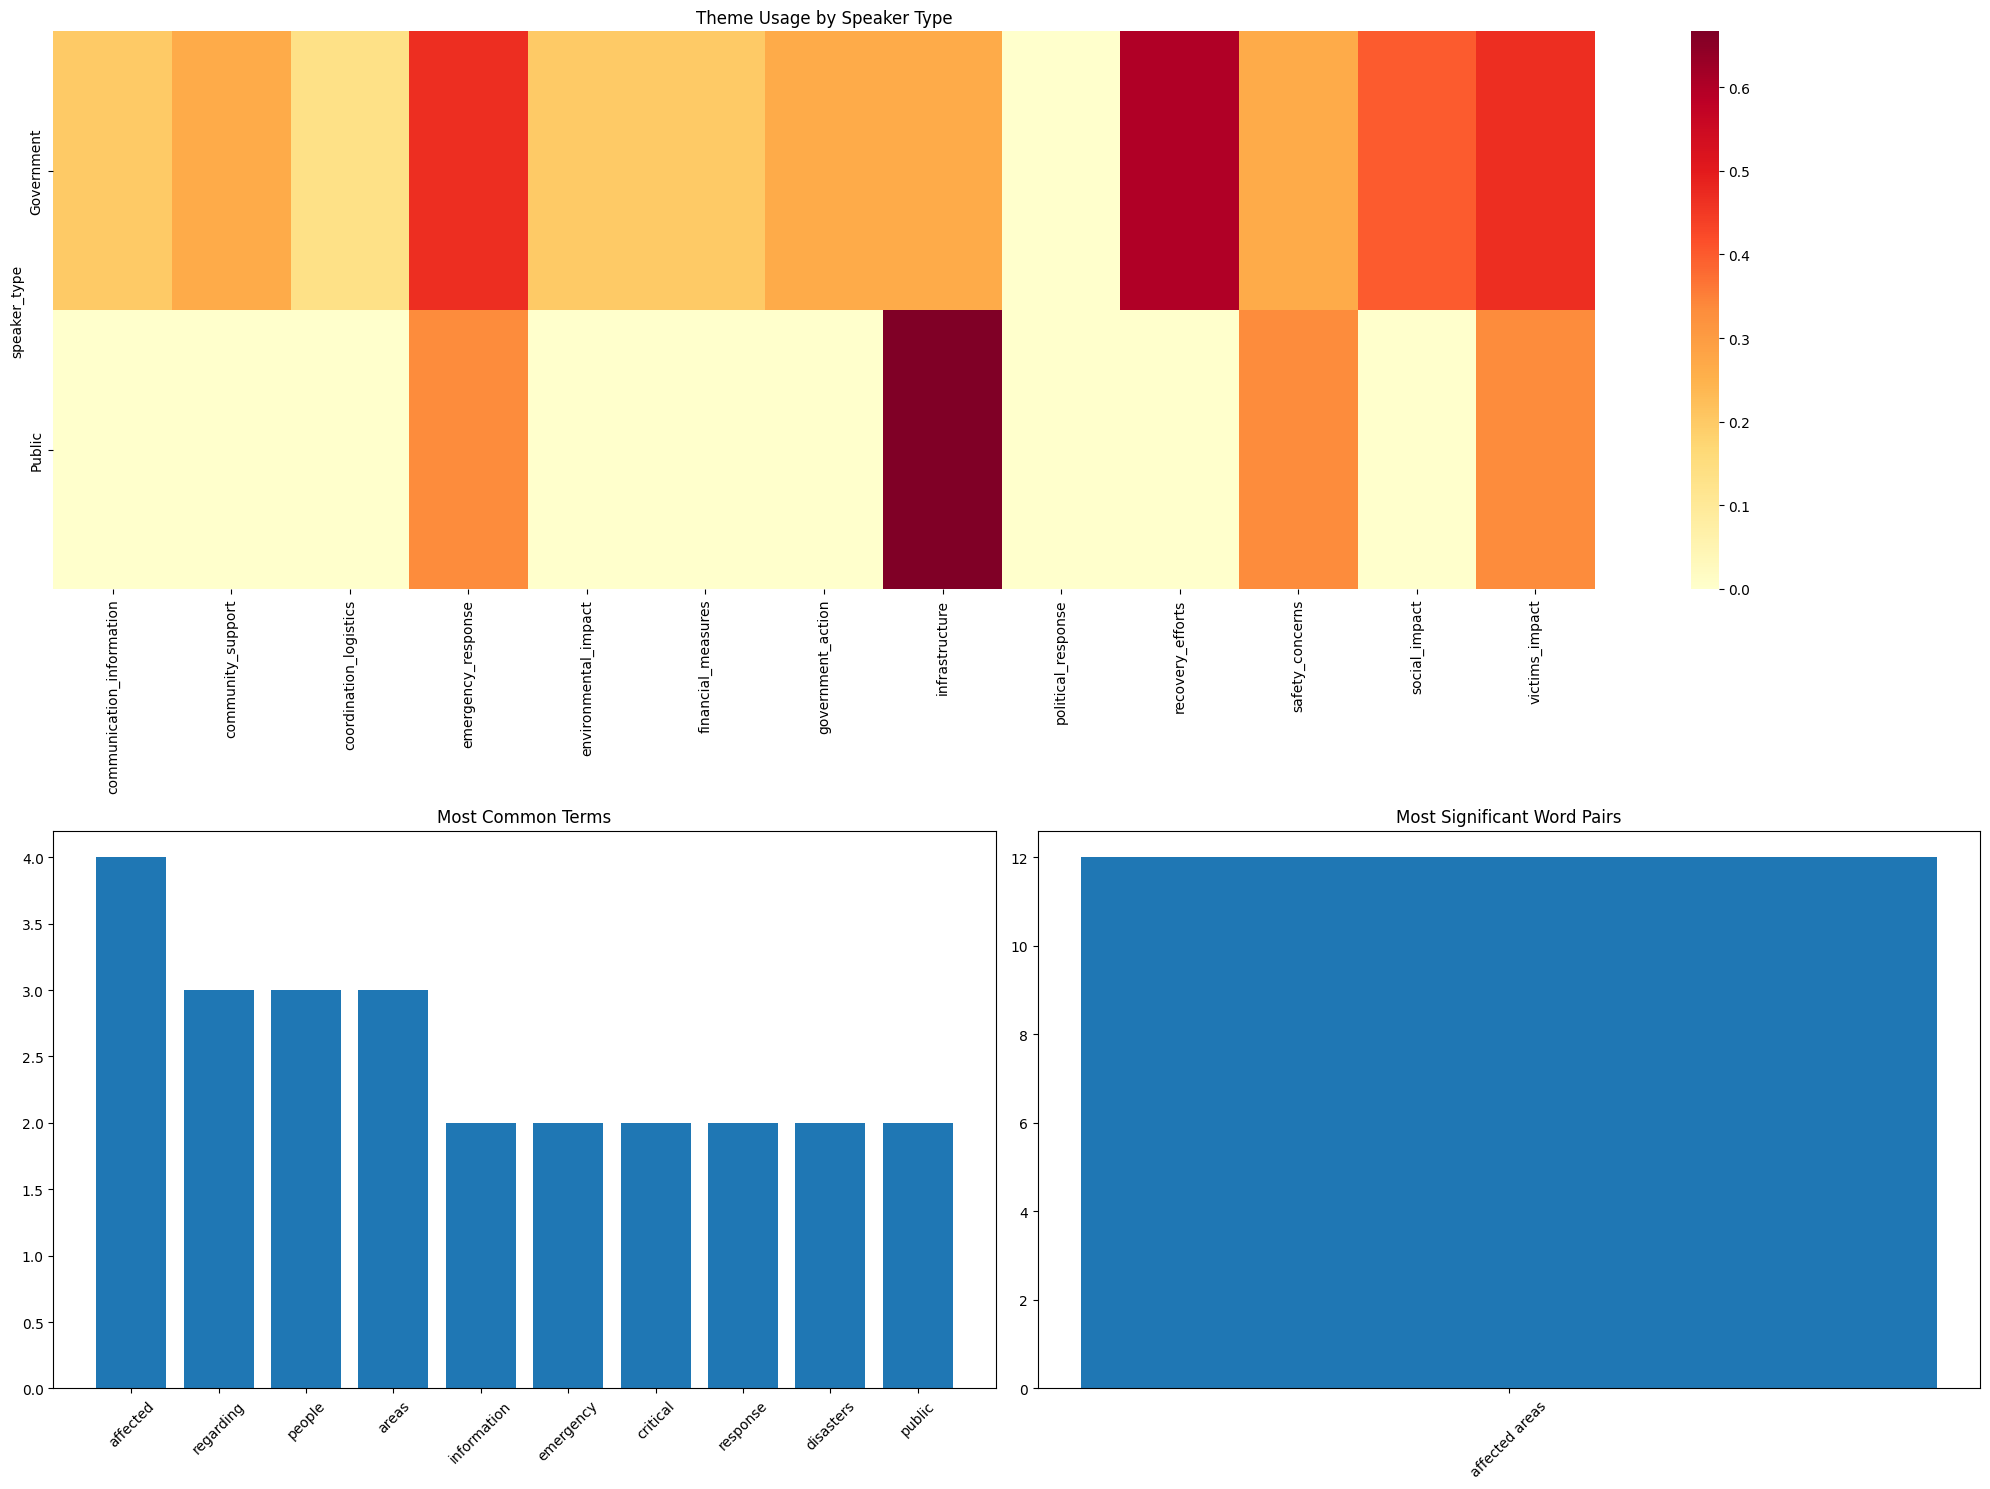


Discourse Pattern Summary:

Most common terms:
- affected: 4
- regarding: 3
- people: 3
- areas: 3
- information: 2
- emergency: 2
- critical: 2
- response: 2
- disasters: 2
- public: 2

Significant word pairs:
- affected areas


In [ ]:
# Example usage:
analyzer = run_discourse_analysis('pedrosanchez.csv')